### Excercise 11: Gaussian Discriminant Analysis

In [7]:
import numpy as np
import matplotlib.pyplot as plt

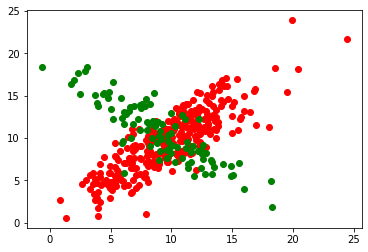

In [38]:
# Synthetic data
mu1 = np.array([10,10])
mu2 = np.array([10,10])

sigma1 = np.array([[14,12], [12,14]])
sigma2 = np.array([[14,-12], [-12,14]])

X1 = np.random.multivariate_normal(mu1,sigma1,300)
X2 = np.random.multivariate_normal(mu1,sigma2,100)

plt.plot(X1[:,0],X1[:,1],'ro')
plt.plot(X2[:,0],X2[:,1],'go')
plt.show()

Give these data, we estimate the parameters of the GDA (Gaussian Discriminant Analysis)

In [62]:
# Estimate means and covariances
mu_r = X1.mean(axis=0)
mu_g = X2.mean(axis=0)

cov_r = np.cov(X1.T)
cov_g = np.cov(X2.T)

p_y_1 = X1.shape[0]/(X1.shape[0]+X2.shape[0])
p_y_2 =  X2.shape[0]/(X1.shape[0]+X2.shape[0])

In [72]:
means = np.array([mu_r,mu_g])
covs = np.array([cov_r,cov_g])
p_y_s = np.array([p_y_1,p_y_2])

In [73]:
# Inference: p(Y=y|X=x) propto p(X=x|Y=y).p(Y=y)

X = np.concatenate((X1,X2),0)
y = np.concatenate((np.zeros((X1.shape[0],1)),np.ones((X2.shape[0],1))),0)

def gauss_density(X,mu,sigma):
    k = X.shape[1]
    siginv = np.linalg.inv(sigma)
    d = np.zeros((X.shape[0], 1))
    for i in range(X.shape[0]):
        x = X[i,:]
        d[i] = -0.5 * (x-mu) @ siginv @ (x-mu)
    return (2 * np.pi)**(-k/2) / np.sqrt(np.linalg.det(sigma)) * np.exp(d)

In [78]:
def gda_infer(K,X,means,covs,p_y_s):
    p_ys = []
    norm = 0
    for i in range(K):
        p_x_y = gauss_density(X,means[i],covs[i])
        p_ys.append(p_x_y * p_y_s[i])
    for i in range(K):
        norm =  norm + p_ys[i]
    return p_ys, norm

In [79]:
p_ys, norm = gda_infer(2,X,means,covs,p_y_s)

In [80]:
p_y1 = p_ys[0]/norm
p_y2 = p_ys[1]/norm

In [57]:
p_x_y1 = gauss_density(X,mu_r,cov_r)
p_x_y2 = gauss_density(X,mu_g,cov_g)
p_y1 = p_x_y1 * p_y_1
p_y2 = p_x_y2 * p_y_2

In [58]:
# Normalize
norm = p_y1 + p_y2
p_y1 = p_y1/norm
p_y2 = p_y2/norm

In [60]:
# Finished!
train_acc = (np.concatenate((p_y1, p_y2), 1).argmax(axis=1)==y.reshape(-1)).sum() / X.shape[0]
print('Training accuracy: %f' % train_acc)

Training accuracy: 0.887500
